# Programming Assignment 4

--------------------------------------------------------------------

# Task 1:

In [ ]:

import pandas as pd
import numpy as np

# ***Subtask1: Data Loading and Data Preparation***

## **REPORT**
1. dataset that was created contains 23 features and 1 target value = Rating. To achieve the final state of dataset, the following steps were performed:
  * while creating dataset, the colums Zip-code and Timestamp were deleted.
  * Gender feature was converted from categorical to numerical value: M - 1, F-0.
  * Genres - each movie had 1 and more genres, that's why the column was converted using one-hot encoding to assign for each movie its' genres (when movie was categorized as Sci-Fi and Action, in the columns Sci-Fi and Action are 1, while the rest columns for genres are 0's)
  * Column 'Title' was also deleted as it has its' numerical representation in MovieID feature.

2.  Training and test sizes after removing users who rated less than 100 movies, data splitted as test set containing users with ids between 1 and 1000 and rest for training set:
  * features train shape:  (719277, 23)
  * features test shape:  (128025, 23)

In [ ]:
#functions to process the dataset
def load_process_data(file_path,columns):
    data =pd.read_csv(file_path, sep="::", header=None, names=columns, engine="python",encoding='latin-1')

    return data

def construct_dataset(users_df, movies_df, ratings_df):
    # Merge data to construct feature vectors
    merged_df = pd.merge(ratings_df, users_df, on="UserID")
    merged_df = pd.merge(merged_df, movies_df, on="MovieID")
    print(merged_df.shape)
    #• Remove all users which have rated less than 100 movies.
    user_reviews_counts = merged_df["UserID"].value_counts()
    valid_users = user_reviews_counts[user_reviews_counts >= 100].index
    filtered_df = merged_df[merged_df["UserID"].isin(valid_users)]

    print(filtered_df.shape)

    return filtered_df

def construct_train_test_data(filtered_df):
    # the test data from all the ratings of users with user ids 1, ... , 1000
    test_data = filtered_df[filtered_df['UserID'].between(1, 1000)]

    #the remaining ratings for training data
    train_data = filtered_df[~filtered_df['UserID'].isin(test_data['UserID'])]
    y_train=train_data['Rating']
    x_train=train_data.drop(['Rating'], axis=1)
    y_test=test_data["Rating"]
    x_test=test_data.drop(['Rating'], axis=1)
    return x_train,y_train,x_test,y_test





In [ ]:

users = ['users.dat', ["UserID", "Gender", "Age", "Occupation", "Zip-code"]]
movies = ['movies.dat',["MovieID", "Title", "Genres"]]
ratings = ['ratings.dat',["UserID", "MovieID", "Rating", "Timestamp"]]

users_df = load_process_data(users[0],users[1]).iloc[:, :-1] #skip zip-code column
movies_df = load_process_data(movies[0],movies[1])
ratings_df =load_process_data(ratings[0],ratings[1]).iloc[:,:-1] #skip timestamp


In [ ]:
dataset = construct_dataset(users_df, movies_df, ratings_df)


(1000209, 8)
(847302, 8)


In [ ]:
print("Unique occupation: ",len(np.unique(dataset['Occupation'])),
      "\nUnique movies: ",len(np.unique(dataset['MovieID'])))



Unique occupation:  21 
Unique movies:  3670


In [ ]:
dataset.dtypes

UserID         int64
MovieID        int64
Rating         int64
Gender        object
Age            int64
Occupation     int64
Title         object
Genres        object
dtype: object

In [ ]:
classes= np.unique(dataset['Rating'])
print(classes)


[1 2 3 4 5]


#### changing categorical features -> numerical representation


In [ ]:
# Convert 'Genres' using one-hot encoding
genres_dummies = dataset['Genres'].str.get_dummies(sep='|')
genres_dummies[:10]
dataset = pd.concat([dataset, genres_dummies], axis=1)
dataset = dataset.drop('Genres', axis=1)

# Convert 'Gender' using binary encoding
dataset['Gender'] = dataset['Gender'].map({'M': 1, 'F': 0})

In [ ]:
dataset.shape

(847302, 25)

In [ ]:
dataset[:10]

,UserID,MovieID,Rating,Gender,Age,Occupation,Title,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,2,1193,5,1,56,16,One Flew Over the Cuckoo's Nest (1975),0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,1193,4,1,25,7,One Flew Over the Cuckoo's Nest (1975),0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,1193,5,1,50,1,One Flew Over the Cuckoo's Nest (1975),0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,18,1193,4,0,18,3,One Flew Over the Cuckoo's Nest (1975),0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,19,1193,5,1,1,10,One Flew Over the Cuckoo's Nest (1975),0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,24,1193,5,0,25,7,One Flew Over the Cuckoo's Nest (1975),0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,28,1193,3,0,25,1,One Flew Over the Cuckoo's Nest (1975),0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,33,1193,5,1,45,3,One Flew Over the Cuckoo's Nest (1975),0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,42,1193,3,1,25,8,One Flew Over the Cuckoo's Nest (1975),0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,44,1193,4,1,45,17,One Flew Over the Cuckoo's Nest (1975),0,0,0,...,0,0,0,0,0,0,0,0,0,0


### droping the title column, as the title has its numerical equivalent as the MovieID column

In [ ]:
dataset= dataset.drop(['Title'],axis=1)

In [ ]:
x_train,y_train,x_test,y_test = construct_train_test_data(dataset)

In [ ]:
x_train

,UserID,MovieID,Gender,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
279,1010,1193,1,25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
281,1015,1193,1,35,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
282,1017,1193,1,35,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
283,1018,1193,1,18,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
284,1019,1193,1,35,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,1,18,17,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000205,5675,2703,1,35,14,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000206,5780,2845,1,18,17,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000207,5851,3607,0,18,20,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
print("features train shape: ",x_train.shape,"\nfeatures test shape: ",x_test.shape)

features train shape:  (719277, 23) 
features test shape:  (128025, 23)


# ***subtask 2:  Basic Movie Recommendation***


## **OVERALL REPORT**

Explanation:

  *  *for MLP Classifier I decided only for adaptive learning rate, as it increases/decreases based on the gradient value of the cost function. For higher gradient value, learning rate will be smaller, for lower value, the learning rate will be larger.*

  * *in the case of LinearSVC, I decided to use 'ovr' as a multi-class parameter, as the training time is much longer in the case of crammer_singer*

1. Hyperparameter tuning:

  for MLP classifier i considered the following values:


    * hidden_layer_sizes: [(100,), (50, 50), (50, 40, 30)],
    * activation: ['tanh', 'relu'],
    * alpha: [0.0001, 0.005],
    * learning_rate: ['adaptive']
  
  for Linear SVM i considered following values of
    * C: [0.001, 0.01, 0.1, 1, 10]
    * multi_class: 'ovr' (one vs rest approach)

2. Best performance: - i decided to go with GridSearchCV results:
  * MLP Classifier with 'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive' on **the whole** dataset, result for test set:  
  MLP test accuracy:  0.35360281195079085
  
  *  LinearSVC classifier with 'C': 0.01, 'multi_class': 'ovr' on **the whole** dataset, result for test set:

    SVM test accuracy:  0.2882093341144308

3. Constant prediction can be seen at the end of the task, as always predcting mean value of the rating in training set. When we consider a mode from  target training set, we achieve:

  Accuracy with constant prediction: 0.35360281195079085

In [ ]:
#libraries

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


### Only 15% of the training set was considered for hyperparameter tuning because the dataset is huge, so calculations on the entire training set take too much time.

In [ ]:
x_train_15 = x_train.sample(frac=0.15)
y_train_15= y_train.sample(frac=0.15)

* cv=5 is for cross validation: 5-folds Stratified K-fold CV

* n_jobs=-1 , -1 means using all the CPU cores available

## using k-fold CV

In [ ]:
from sklearn.model_selection import cross_val_score

#Multi-layer Perceptron (MLP) classifier
mlp = MLPClassifier(max_iter=100)

#hyperparameter search space
parameter_space = {
    'hidden_layer_sizes': [(100,), (50, 50), (50, 40, 30)],
    'activation': ['tanh', 'relu'],
    'alpha': [0.0001, 0.005],
    'learning_rate': ['adaptive'],
}

# track the best score and corresponding parameters
best_score = 0
best_params = None

for hidden_layer_sizes in parameter_space['hidden_layer_sizes']:
    for activation in parameter_space['activation']:
        for alpha in parameter_space['alpha']:
            for learning_rate in parameter_space['learning_rate']:
                mlp.set_params(hidden_layer_sizes=hidden_layer_sizes,
                               activation=activation, alpha=alpha, learning_rate=learning_rate)
                # cross-validation with 5 folds
                scores = cross_val_score(mlp, x_train_15, y_train_15, cv=5, n_jobs=-1)
                mean_score = scores.mean()
                # updating the best score and parameters
                if mean_score > best_score:
                    best_score = mean_score
                    best_params = {
                        'hidden_layer_sizes': hidden_layer_sizes,
                        'activation': activation,
                        'alpha': alpha,
                        'learning_rate': learning_rate
                    }

print("Best MLP Parameters:", best_params)
print("Best MLP Mean Test Score:", best_score)



Best MLP Parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'alpha': 0.0001, 'learning_rate': 'adaptive'}
Best MLP Mean Test Score: 0.3483668853257663


### using GridSearchCV

In [ ]:
# MLP Classifier
mlp = MLPClassifier(max_iter=100)

# hyperparameter search space
parameter_space = {
    'hidden_layer_sizes': [(100,),(50,50),(50,40,30)],
    'activation': ['tanh','relu'],
    'alpha': [0.0001, 0.005],
    'learning_rate':['adaptive'], # the learning rate increases/decreases based on the gradient value of the cost function. For higher gradient value, learning rate will be smaller, for lower value, the learning rate will be larger.
}

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
clf.fit(x_train_15, y_train_15)
print("Best MLP Parameters:", clf.best_params_)

# mean test scores, standard deviations, and corresponding hyperparameters
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.5f (+/-%0.05f) for %r" % (mean, std * 2, params))

#predictions, based on model that was learning on 15% training set
y_pred_mlp = clf.predict(x_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_test, y_pred_mlp))



Best MLP Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive'}
0.34837 (+/-0.00003) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive'}
0.34837 (+/-0.00003) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive'}
0.34837 (+/-0.00003) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 40, 30), 'learning_rate': 'adaptive'}
0.34837 (+/-0.00003) for {'activation': 'tanh', 'alpha': 0.005, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive'}
0.34837 (+/-0.00003) for {'activation': 'tanh', 'alpha': 0.005, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive'}
0.34837 (+/-0.00003) for {'activation': 'tanh', 'alpha': 0.005, 'hidden_layer_sizes': (50, 40, 30), 'learning_rate': 'adaptive'}
0.17388 (+/-0.08460) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive'}

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### MLP classifier: using hyperparameters for the whole training set

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,),activation='tanh',alpha=0.0001, learning_rate='adaptive', max_iter=100)
mlp.fit(x_train, y_train)
y_pred_mlp_final = mlp.predict(x_test)
print('MLP Results on the test set with selected best hyperparameters:')
print(classification_report(y_test, y_pred_mlp_final))

MLP Results on the test set with selected best hyperparameters:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      6936
           2       0.00      0.00      0.00     14405
           3       0.21      0.00      0.00     34570
           4       0.35      1.00      0.52     45270
           5       0.20      0.00      0.01     26844

    accuracy                           0.35    128025
   macro avg       0.15      0.20      0.11    128025
weighted avg       0.22      0.35      0.19    128025



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####  checking hidden layers = (50,40,30), activation function relu with alpha 0.005 as it achieved the same score as with hidden layers= (100,) tanh activation and alpha=0.0001

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(50,40,30),activation='relu',alpha=0.005, learning_rate='adaptive', max_iter=100)
mlp.fit(x_train, y_train)
y_pred_mlp_final2 = mlp.predict(x_test)
print('MLP Results on the test set with selected best hyperparameters:')
print(classification_report(y_test, y_pred_mlp_final2))

MLP Results on the test set with selected best hyperparameters:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      6936
           2       0.00      0.00      0.00     14405
           3       0.00      0.00      0.00     34570
           4       0.35      1.00      0.52     45270
           5       0.00      0.00      0.00     26844

    accuracy                           0.35    128025
   macro avg       0.07      0.20      0.10    128025
weighted avg       0.13      0.35      0.18    128025



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## LINEAR SVM

## with k-fold CV

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

svm = LinearSVC()

#list of regularization parameters (C values)
Cs= [0.001, 0.01, 0.1, 1, 10]


best_score = 0
best_param = None

for C in Cs:
      svm.set_params(C=C, multi_class='ovr')

      scores = cross_val_score(svm, x_train_15, y_train_15, cv=5, n_jobs=-1)
      mean_score = scores.mean()

      if mean_score > best_score:
          best_score = mean_score
          best_param=C

print("Best Linear SVM Parameters:", best_param)
print("Best Linear SVM Mean Test Score:", best_score)



Best Linear SVM Parameters: 0.001
Best Linear SVM Mean Test Score: 0.27899233020799175


## with GridSearchCV

In [ ]:

# Linear SVM
svm = LinearSVC()
svm_params = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'multi_class': ['ovr'],
}
#grid search with 5-fold cross-validation
svm_clf = GridSearchCV(svm, svm_params, n_jobs=-1, cv=5)
svm_clf.fit(x_train_15, y_train_15)
print("Best Linear SVM Parameters:", svm_clf.best_params_)

means = svm_clf.cv_results_['mean_test_score']
stds = svm_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svm_clf.cv_results_['params']):
    print("%0.5f (+/-%0.05f) for %r" % (mean, std * 2, params))
 #predictions on the test set using the best model trained on 15% train set
y_pred_svm = svm_clf.predict(x_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_test, y_pred_svm))


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best Linear SVM Parameters: {'C': 0.01, 'multi_class': 'ovr'}
0.25638 (+/-0.20014) for {'C': 0.001, 'multi_class': 'ovr'}
0.28525 (+/-0.16739) for {'C': 0.01, 'multi_class': 'ovr'}
0.23177 (+/-0.10342) for {'C': 0.1, 'multi_class': 'ovr'}
0.18439 (+/-0.14578) for {'C': 1, 'multi_class': 'ovr'}
0.27589 (+/-0.13224) for {'C': 10, 'multi_class': 'ovr'}
Results on the test set:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      6936
           2       0.00      0.00      0.00     14405
           3       0.26      0.00      0.00     34570
           4       0.36      0.38      0.37     45270
           5       0.19      0.55      0.28     26844

    accuracy                           0.25    128025
   macro avg       0.16      0.19      0.13    128025
weighted avg       0.24      0.25      0.19    128025



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Linear SVC: using hyperparameters for the whole training set

In [ ]:
svm = LinearSVC(C= 0.01, multi_class='ovr')
svm.fit(x_train, y_train)
y_pred_svm_final = svm.predict(x_test)
print('SVM Results on the test set with selected best hyperparameters:')
print(classification_report(y_test, y_pred_svm_final))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM Results on the test set with selected best hyperparameters:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      6936
           2       0.00      0.00      0.00     14405
           3       0.28      0.81      0.41     34570
           4       0.35      0.12      0.18     45270
           5       0.32      0.12      0.18     26844

    accuracy                           0.29    128025
   macro avg       0.19      0.21      0.15    128025
weighted avg       0.27      0.29      0.21    128025



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Constant prediction: mode and median approach

In [ ]:
#mode approach for constant prediction
from scipy import stats as st
majority_class = st.mode(y_train)[0] #finding mode - most frequent value in training set, it will be used as a prediction for all instances
constant_predictions = np.full_like(y_test, fill_value=majority_class) # creates array filled with majority class and has length the same as test set

# Calculate accuracy for the constant prediction
constant_accuracy = accuracy_score(y_test, constant_predictions)

print(f"Accuracy with constant prediction (mode approach): {constant_accuracy}")
print("MLP test accuracy: ", accuracy_score(y_test, y_pred_mlp_final))
print("SVM test accuracy: ", accuracy_score(y_test, y_pred_svm_final))

Accuracy with constant prediction (mode approach): 0.35360281195079085
MLP test accuracy:  0.3531575864089045
SVM test accuracy:  0.2882093341144308


In [ ]:
# Constant prediction accuracy (mean rating)
mean_rating = np.mean(y_train)
constant_pred = np.full_like(y_test, fill_value=mean_rating)
constant_accuracy = accuracy_score(y_test, constant_pred)
print("Constant Prediction Test Accuracy (mean approach):", constant_accuracy)
print("MLP test accuracy: ", accuracy_score(y_test, y_pred_mlp_final))
print("SVM test accuracy: ", accuracy_score(y_test, y_pred_svm_final))


Constant Prediction Test Accuracy (mean approach): 0.27002538566686196
MLP test accuracy:  0.3531575864089045
SVM test accuracy:  0.2882093341144308


# ***Subtask 3: Classifier Evaluation I***

## **REPORT**
1. obtained matrices can be seen below for LinearSVC and for MLP Classifier.

2. Classification accuracies:
* SVM classifier accuracy: 0.2882093341144308
* MLP classifier accuracy: 0.3531575864089045



In [ ]:
def confusion_matrix(y_true, y_pred, num_classes):
    # initializing matrix with zeros
    matrix = [[0] * num_classes for _ in range(num_classes)]
    #  filling in the confusion matrix
    for true_label, pred_label in zip(y_true, y_pred):
        matrix[true_label - 1][pred_label - 1] += 1

    return matrix

def accuracy_from_confusion_matrix(conf_matrix):
    # computing  overall accuracy from the confusion matrix
    total_samples = sum(sum(row) for row in conf_matrix)
    correct_predictions = sum(conf_matrix[i][i] for i in range(len(conf_matrix)))
    accuracy = correct_predictions / total_samples
    return accuracy


def cm_as_dataframe(matrix):
  #for a nicer representation of confusion matrix :)
  columns = [f'Predicted {i+1}' for i in range(len(matrix))]
  index = [f'Actual {i+1}' for i in range(len(matrix))]
  return pd.DataFrame(matrix,columns=columns,index=index)


num_classes = len(np.unique(y_test))


In [ ]:


#confusion matrix for LinearSVC classifier
svm_conf_matrix = confusion_matrix(y_test, y_pred_svm_final, num_classes)

#accuracy from confusion matrix
svm_accuracy = accuracy_from_confusion_matrix(svm_conf_matrix)
print("SVM classifier accuracy:", svm_accuracy)

print("Confusion matrix for linear SVC classifier:")
cm_as_dataframe(svm_conf_matrix)




SVM classifier accuracy: 0.2882093341144308
Confusion matrix for linear SVC classifier:


,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5
Actual 1,0,0,5819,792,325
Actual 2,0,0,11884,1747,774
Actual 3,0,0,28091,4195,2284
Actual 4,0,0,36027,5488,3755
Actual 5,0,0,20282,3243,3319


In [ ]:
#confusion matrix for MLP classifier
mlp_conf_matrix = confusion_matrix(y_test, y_pred_mlp_final, num_classes)

#accuracy from confusion matrix
mlp_accuracy = accuracy_from_confusion_matrix(mlp_conf_matrix)
print("MLP classifier accuracy:", mlp_accuracy)

print("Confusion matrix for linear MLP classifier:")
cm_as_dataframe(mlp_conf_matrix)


MLP classifier accuracy: 0.3531575864089045
Confusion matrix for linear MLP classifier:


,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5
Actual 1,0,0,1,6916,19
Actual 2,0,0,6,14347,52
Actual 3,0,0,9,34411,150
Actual 4,0,0,18,45112,140
Actual 5,0,0,9,26743,92


# **TASK 2**

# ***subtask 1: Classification data***

## **REPORT**

1. how does dataset look like:

Sizes of sets:

 X train:  (500, 2)

 Y train:  (500, 1)

 X test:  (10000, 2)

 Y test:  (10000, 1)

In [280]:
import h5py
hf = h5py.File('classification.h5', 'r')
x_train2 = np.array(hf.get('x_train'))
y_train2 = np.array(hf.get('y_train'))
x_test2 = np.array(hf.get('x_test'))
y_test2 = np.array(hf.get('y_test'))
hf.close()

In [281]:
print("Sizes of sets: \n",
      "X train: ",x_train2.shape,
      "\n Y train: ",y_train2.shape,
      "\n X test: ",x_test2.shape,
      "\n Y test: ",y_test2.shape)


Sizes of sets: 
 X train:  (500, 2) 
 Y train:  (500, 1) 
 X test:  (10000, 2) 
 Y test:  (10000, 1)


In [282]:
from sklearn.preprocessing import MinMaxScaler

trans = MinMaxScaler()
x_train2 = trans.fit_transform(x_train2)
x_test2 = trans.transform(x_test2)


# ***subtask 2: Forward Propagation***

## **REPORT**
1.
* Initialization of Weights and Biases:
  * decided to use the He initialization method, which initializes the weights with random values drawn from a normal distribution with mean 0 and variance 2 divided by the number of input neurons in the previous layer.

  * Biases are initialized as zeros.
* Forward Propagation:
  The forward propagation function takes input features, weights, biases, and activation functions for hidden and output layers.
  It iterates through the hidden layers using the specified activation function and computes the final output using the specified activation function for the output layer.


### activation functions

In [283]:
# ReLU activation function
def relu(z):
    return np.maximum(0, z)

# Sigmoid activation function
def sigmoid(z):
    return  1/(1+np.exp(-z))

#Tangent activation function
def tanh(z):
    return np.tanh(z)

In [284]:
import numpy as np

#initialize weights and biases
def initialize_parameters(layer_sizes):
    np.random.seed(42)
    num_layers = len(layer_sizes) - 1
    # Initialize weights using He(common for ReLU)
    weights = [np.random.randn(layer_sizes[i], layer_sizes[i+1]) * np.sqrt(2 / layer_sizes[i])
               for i in range(num_layers)]
    # Initialize biases as zeros
    biases = [np.zeros((1, layer_sizes[i+1])) for i in range(num_layers)]

    return weights, biases


# Forward propagation
def forward_propagation(x, weights, biases, activation_hidden,activation_output):
    a=x
    for b, w in zip(biases[:-1], weights[:-1]):
            a = activation_hidden(np.dot( a,w)+b) #hidden layers

    z_final = np.dot(a,weights[-1]) + biases[-1] #output
    y_pred = activation_output(z_final)
    return y_pred

# Define the architecture1
input_size = x_train.shape[1]
hidden_size = 10
output_size = 1
layer_sizes = [input_size, hidden_size, hidden_size, output_size]


# Initializing parameters
weights, biases = initialize_parameters(layer_sizes)


# initialized weight and bias sizes
for i, (w, b) in enumerate(zip(weights, biases), 1):
    print(f"Layer {i} - Weights shape: {w.shape}, Biases shape: {b.shape}")

# Forward propagation for training data
y_pred_train2 = forward_propagation(x_train, weights, biases,relu,relu)

#print(accuracy_score(y_train2, y_pred_train2))
# Forward propagation for testing data
y_pred_test2 = forward_propagation(x_test, weights, biases,relu,relu)

#print(accuracy_score(y_test2, y_pred_test2))

Layer 1 - Weights shape: (23, 10), Biases shape: (1, 10)
Layer 2 - Weights shape: (10, 10), Biases shape: (1, 10)
Layer 3 - Weights shape: (10, 1), Biases shape: (1, 1)


# ***subtask 3: Finite Difference Gradient & Optimization***

## **REPORT**
1. Results in form of plots for different variations of activation function for hidden and output layers can be seen below. As well as classification accuracies during training process for epochs%100 ==0

2.  Training time is also reported below each variation of activation functions.

3. For each variation of activation functions, different results are achieved.
* A1 is an architecture 1 with 2 hidden layers : 10,10
* A2 is an architecture 2 with 2 hidden layers: 20,10


Results presented as:
   1. Architecture: activation function for hidden layer, activation function for output layer = test loss, test accuracy:
--------------------------------------
* A1: relu,relu= test loss=0.1724 , test accuracy = 0.6849
* A2: relu,relu= test loss=0.49366 , test accuracy= 0.5155
--------------------------------------
* ***A1: relu,sigmoid = test loss: 0.0549, test accuracy =0.9414***
* A2:  relu,sigmoid = test loss= 0.0326 , test accuracy = 0.9638
--------------------------------------
* A1:  sigmoid,sigmoid=test loss= 0.1410, test accuracy= 0.7948
* A2:  sigmoid,sigmoid=test loss= 0.0377 , test accuracy= 0.965
--------------------------------------
* A1: tangent,sigmoid= test loss= 0.1938, test accuracy= 0.8016
* A2: tangent,sigmoid= test loss= 0.1258, test accuracy= 0.8184
--------------------------------------
* A1: sigmoid,tangent = test loss= 0.0828, test accuracy= 0.9294
* ***A2: sigmoid,tangent = test loss= 0.0308 , test accuracy= 0.9662***
--------------------------------------
* A1: tangent,tangent = test loss= 0.2017, test accuracy= 0.7979
* A2: tangent,tangent =test loss=0.1418 , test accuracy= 0.807


#### **Conclusion**: The results are better when we consider architecture 2 with different combination of hidden layer units for both hidden layers.

####  When using ReLU as the output activation function, the performance is worst because ReLU should not be used as the output activation function as it takes the maximum value.

#### Taking into account different activation functions and different architectures we achieve the best results for:

1. A1: relu,sigmoid = test loss: 0.0549, test accuracy =0.9414
2. A2: sigmoid,tangent = test loss= 0.0308 , test accuracy= 0.9662


## **REPORT**



In [285]:
from stochastic_optimizers import AdamOptimizer
import time


# Define finite difference approximation of the gradient
def finite_difference_gradient(x, y, weights, biases, activation_hidden, activation_output,epsilon=1e-5):
    gradients_weights = []
    gradients_biases = []

    for layer in range(len(weights)):
        w_shape = weights[layer].shape
        b_shape = biases[layer].shape

        # Initialize gradients for weights and biases
        grad_w = np.zeros(w_shape)
        grad_b = np.zeros(b_shape)

        for i in range(w_shape[0]):
            for j in range(w_shape[1]):
                # Compute gradient for weights
                weights_plus_epsilon = weights.copy()
                weights_plus_epsilon[layer][i, j] += epsilon
                y_pred_plus_epsilon = forward_propagation(x, weights_plus_epsilon, biases,activation_hidden,activation_output)
                loss_plus_epsilon = mean_squared_error(y, y_pred_plus_epsilon)

                weights_minus_epsilon = weights.copy()
                weights_minus_epsilon[layer][i, j] -= epsilon
                y_pred_minus_epsilon = forward_propagation(x, weights_minus_epsilon, biases,activation_hidden,activation_output)
                loss_minus_epsilon = mean_squared_error(y, y_pred_minus_epsilon)

                grad_w[i, j] = (loss_plus_epsilon - loss_minus_epsilon) / (2 * epsilon)

        for j in range(b_shape[1]):
            # Compute gradient for biases
            biases_plus_epsilon = biases.copy()
            biases_plus_epsilon[layer][0, j] += epsilon
            y_pred_plus_epsilon = forward_propagation(x, weights, biases_plus_epsilon,activation_hidden,activation_output)
            loss_plus_epsilon = mean_squared_error(y, y_pred_plus_epsilon)

            biases_minus_epsilon = biases.copy()
            biases_minus_epsilon[layer][0, j] -= epsilon
            y_pred_minus_epsilon = forward_propagation(x, weights, biases_minus_epsilon,activation_hidden,activation_output)
            loss_minus_epsilon = mean_squared_error(y, y_pred_minus_epsilon)

            grad_b[0, j] = (loss_plus_epsilon - loss_minus_epsilon) / (2 * epsilon)

        gradients_weights.append(grad_w)
        gradients_biases.append(grad_b)

    return gradients_weights, gradients_biases

# Mean Squared Error Loss Function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Training the MLP using finite difference approximation and Adam optimizer
def train_mlp(x_train, y_train, x_test, y_test, weights, biases, activation_hidden, activation_output, learning_rate=1e-3, epochs=1000, tol=1e-3):
    optimizer = AdamOptimizer(weights + biases, learning_rate, 0.9, 0.999, 1e-8)

    start_time = time.time()

    train_loss_history = []
    test_loss_history = []
    train_accuracy_history = []
    test_accuracy_history = []

    for epoch in range(epochs):
        # Forward propagation on training data
        y_pred_train = forward_propagation(x_train, weights, biases, activation_hidden, activation_output)
        train_loss = mean_squared_error(y_train, y_pred_train)
        train_loss_history.append(train_loss)

        # Forward propagation on test data
        y_pred_test = forward_propagation(x_test, weights, biases, activation_hidden, activation_output)
        test_loss = mean_squared_error(y_test, y_pred_test)
        test_loss_history.append(test_loss)

        # Compute accuracy
        train_accuracy = np.mean((y_pred_train > 0.5) == (y_train == 1))
        test_accuracy = np.mean((y_pred_test > 0.5) == (y_test == 1))
        train_accuracy_history.append(train_accuracy)
        test_accuracy_history.append(test_accuracy)

        # Finite difference approximation of the gradient
        gradients_weights, gradients_biases = finite_difference_gradient(x_train, y_train, weights, biases, activation_hidden, activation_output)

        # Update parameters using Adam optimizer
        optimizer.update_params(weights + biases, gradients_weights + gradients_biases)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}/{epochs}, Train Loss: {train_loss}, Test Loss: {test_loss}, Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")
        if train_loss < tol or epoch == epochs - 1:
            print("Converged.")
            break
    end_time = time.time()
    training_time = end_time - start_time
    print(f"Training time: {training_time} seconds")

    return train_loss_history, test_loss_history, train_accuracy_history, test_accuracy_history


### function: ploting mean loss and accuracy

In [286]:
import matplotlib.pyplot as plt

def plot_metrics(train_losses, test_losses, train_accuracies, test_accuracies):
    # Plot Mean Perceptron Loss
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.title('Mean Perceptron Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Classification Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(test_accuracies, label='Test Accuracy')
    plt.title('Classification Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

#### Architectures and weights and biases to test



In [291]:
input_size = x_train2.shape[1]

# Define the architecture1
hidden_size = 10
output_size = 1
layer_sizes = [input_size, hidden_size, hidden_size, output_size]

weights, biases = initialize_parameters(layer_sizes)

# Define the architecture2
hidden_size21 = 20
hidden_size22 = 10
layer_sizes2 = [input_size, hidden_size21, hidden_size22, output_size]


# Initializing parameters
weights2, biases2 = initialize_parameters(layer_sizes2)

### Architecture 1: usage with relu as activation for hidden and output layer

test loss=0.1724 , test accuracy = 0.6849

In [292]:
train_loss_history, test_loss_history, train_accuracy_history, test_accuracy_history = train_mlp(
    x_train2, y_train2, x_test2, y_test2, weights, biases, relu, relu, learning_rate=1e-2, epochs=1000
)

Epoch 0/1000, Train Loss: 0.4879677967493206, Test Loss: 0.4841489533536708, Train Accuracy: 0.512, Test Accuracy: 0.5158
Epoch 100/1000, Train Loss: 0.21828420660367664, Test Loss: 0.23873613161901236, Train Accuracy: 0.658, Test Accuracy: 0.6031
Epoch 200/1000, Train Loss: 0.21363686393204587, Test Loss: 0.23828678722259783, Train Accuracy: 0.662, Test Accuracy: 0.6052
Epoch 300/1000, Train Loss: 0.21157839499255235, Test Loss: 0.2395212911434722, Train Accuracy: 0.63, Test Accuracy: 0.5615
Epoch 400/1000, Train Loss: 0.2113816831365909, Test Loss: 0.23980747889928547, Train Accuracy: 0.632, Test Accuracy: 0.5623
Epoch 500/1000, Train Loss: 0.2111905960036684, Test Loss: 0.2394759483376082, Train Accuracy: 0.634, Test Accuracy: 0.5655
Epoch 600/1000, Train Loss: 0.2078172704148753, Test Loss: 0.23380571173767106, Train Accuracy: 0.63, Test Accuracy: 0.572
Epoch 700/1000, Train Loss: 0.19814493997085572, Test Loss: 0.22339080860057015, Train Accuracy: 0.65, Test Accuracy: 0.5733
Epoch

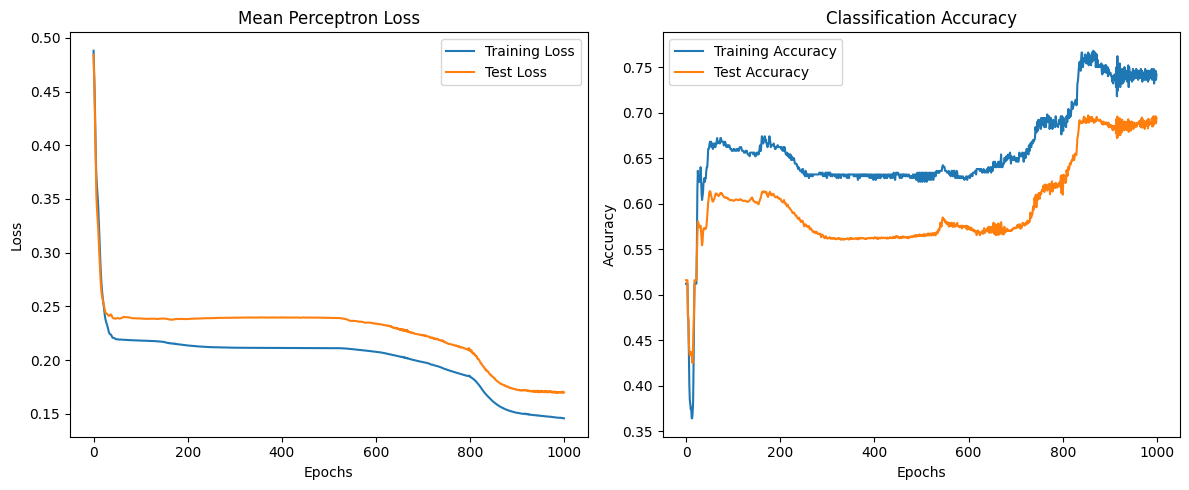

In [ ]:
plot_metrics(train_loss_history, test_loss_history, train_accuracy_history, test_accuracy_history)

### Architecture 2: usage with relu as activation for hidden layer and output layer

test loss=0.49366 , test accuracy= 0.5155

In [306]:
train_loss_history21, test_loss_history21, train_accuracy_history21, test_accuracy_history21 = train_mlp(
    x_train2, y_train2, x_test2, y_test2, weights2, biases2, relu, relu, learning_rate=1e-2, epochs=1000
)


Epoch 0/1000, Train Loss: 518840.8385264239, Test Loss: 504017.322564627, Train Accuracy: 0.624, Test Accuracy: 0.5718
Epoch 100/1000, Train Loss: 8784.119614454718, Test Loss: 8275.805798509718, Train Accuracy: 0.622, Test Accuracy: 0.6103
Epoch 200/1000, Train Loss: 45.28199428309454, Test Loss: 61.280607629874886, Train Accuracy: 0.514, Test Accuracy: 0.5167
Epoch 300/1000, Train Loss: 7.974190272137722, Test Loss: 8.031777059343762, Train Accuracy: 0.508, Test Accuracy: 0.5112
Epoch 400/1000, Train Loss: 3.715205691185333, Test Loss: 2.3925964069381984, Train Accuracy: 0.51, Test Accuracy: 0.5119
Epoch 500/1000, Train Loss: 1.629004508321164, Test Loss: 0.9136570646725033, Train Accuracy: 0.51, Test Accuracy: 0.514
Epoch 600/1000, Train Loss: 0.8118758242425467, Test Loss: 0.587578500331844, Train Accuracy: 0.51, Test Accuracy: 0.5149
Epoch 700/1000, Train Loss: 0.562425340106291, Test Loss: 0.5183412744181093, Train Accuracy: 0.51, Test Accuracy: 0.5155
Epoch 800/1000, Train Loss:

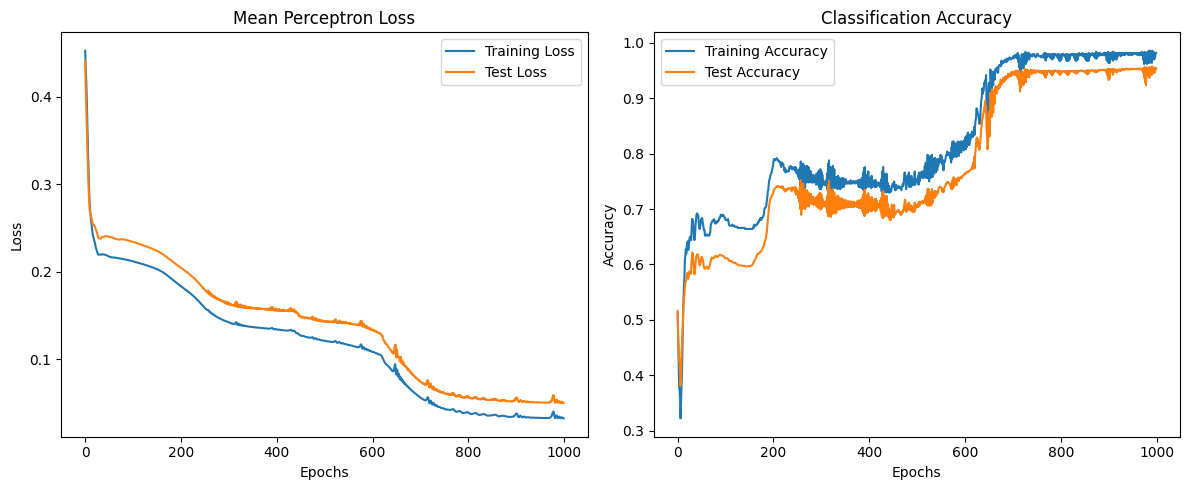

In [294]:
plot_metrics(train_loss_history21, test_loss_history21, train_accuracy_history21, test_accuracy_history21)

### Architecture 1: usage with relu as activation for hidden layer and sigmoid as output layer

 test loss: 0.0549, test accuracy =0.9414

In [295]:
train_loss_history2, test_loss_history2, train_accuracy_history2, test_accuracy_history2 = train_mlp(
    x_train2, y_train2, x_test2, y_test2, weights, biases, relu, sigmoid, learning_rate=1e-2, epochs=1000
)

Epoch 0/1000, Train Loss: 0.20156095421010084, Test Loss: 0.21223446928799866, Train Accuracy: 0.652, Test Accuracy: 0.6221
Epoch 100/1000, Train Loss: 0.16944093271211713, Test Loss: 0.18978190745917903, Train Accuracy: 0.768, Test Accuracy: 0.6992
Epoch 200/1000, Train Loss: 0.15794631750292865, Test Loss: 0.17915430078416064, Train Accuracy: 0.76, Test Accuracy: 0.7007
Epoch 300/1000, Train Loss: 0.1480465672053172, Test Loss: 0.1720674225957365, Train Accuracy: 0.778, Test Accuracy: 0.7055
Epoch 400/1000, Train Loss: 0.13733404179201955, Test Loss: 0.16655220559556955, Train Accuracy: 0.81, Test Accuracy: 0.7245
Epoch 500/1000, Train Loss: 0.13008683224348824, Test Loss: 0.1628102627594657, Train Accuracy: 0.816, Test Accuracy: 0.7343
Epoch 600/1000, Train Loss: 0.0963779908097628, Test Loss: 0.12065203470642048, Train Accuracy: 0.864, Test Accuracy: 0.8076
Epoch 700/1000, Train Loss: 0.05752877510340225, Test Loss: 0.07643569670836307, Train Accuracy: 0.96, Test Accuracy: 0.925
Ep

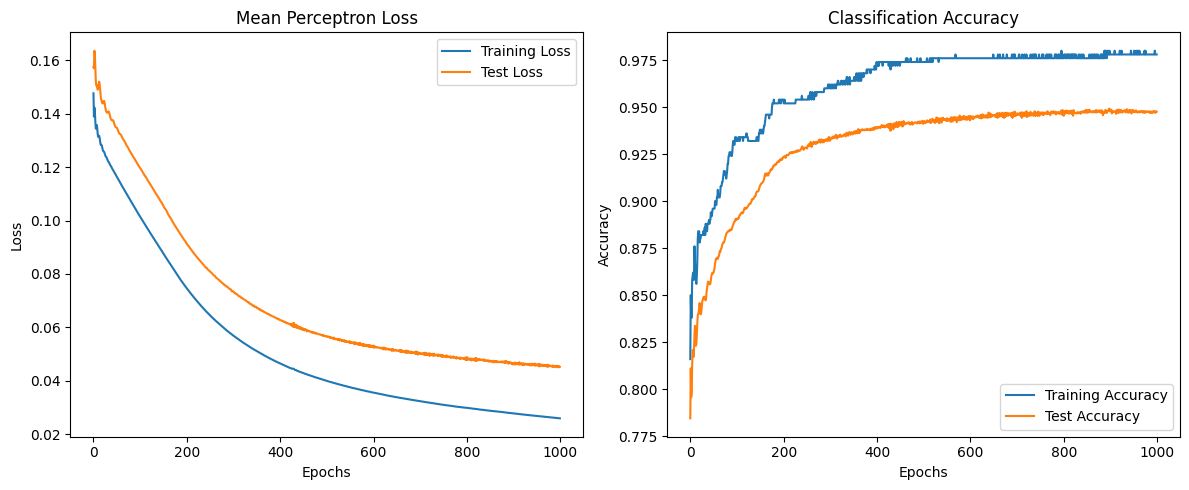

In [ ]:
plot_metrics(train_loss_history2, test_loss_history2, train_accuracy_history2, test_accuracy_history2)

### Architecture 2: usage with relu as activation for hidden layer and sigmoid as output layer

test loss= 0.0326 , test accuracy = 0.9638

In [296]:
train_loss_history22, test_loss_history22, train_accuracy_history22, test_accuracy_history22 = train_mlp(
    x_train2, y_train2, x_test2, y_test2, weights2, biases2, relu, sigmoid, learning_rate=1e-2, epochs=1000
)

Epoch 0/1000, Train Loss: 0.1473520917462905, Test Loss: 0.15291394280737125, Train Accuracy: 0.84, Test Accuracy: 0.8223
Epoch 100/1000, Train Loss: 0.08704704910695688, Test Loss: 0.10291350176526928, Train Accuracy: 0.96, Test Accuracy: 0.9318
Epoch 200/1000, Train Loss: 0.05954003681155399, Test Loss: 0.07528017778000008, Train Accuracy: 0.98, Test Accuracy: 0.9533
Epoch 300/1000, Train Loss: 0.03945999281516725, Test Loss: 0.05526962919355201, Train Accuracy: 0.988, Test Accuracy: 0.9577
Epoch 400/1000, Train Loss: 0.029416952111149718, Test Loss: 0.0450275828746374, Train Accuracy: 0.986, Test Accuracy: 0.9596
Epoch 500/1000, Train Loss: 0.02358968508665641, Test Loss: 0.039369214151688994, Train Accuracy: 0.994, Test Accuracy: 0.963
Epoch 600/1000, Train Loss: 0.019899495492017673, Test Loss: 0.03607500459916598, Train Accuracy: 0.992, Test Accuracy: 0.9646
Epoch 700/1000, Train Loss: 0.017322508912662158, Test Loss: 0.034024892201008745, Train Accuracy: 0.994, Test Accuracy: 0.

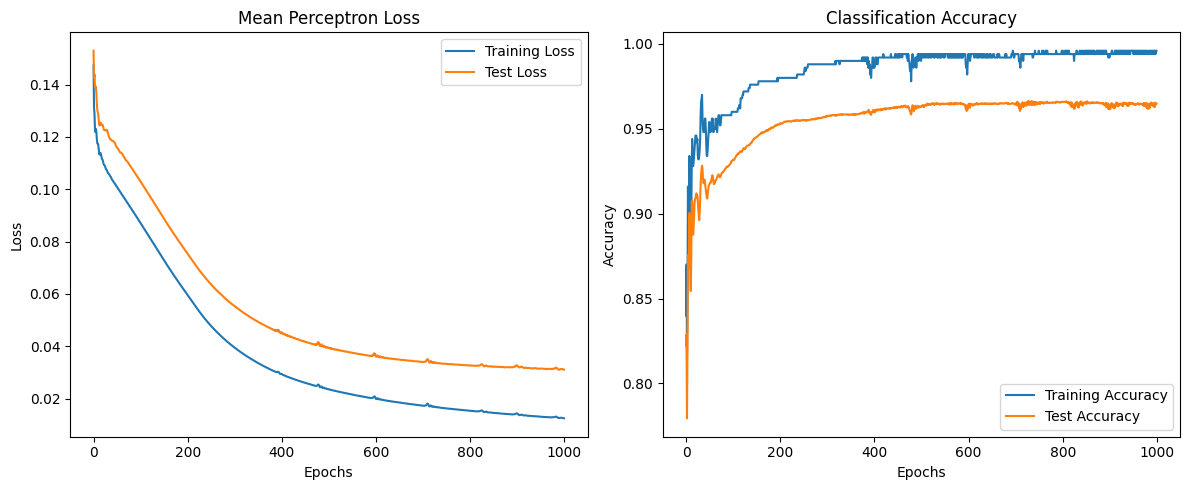

In [297]:
plot_metrics(train_loss_history22, test_loss_history22, train_accuracy_history22, test_accuracy_history22)

###  Architecture 1: usage with sigmoid as activation for hidden and output layer

test loss= 0.1410, test accuracy= 0.7948

In [ ]:
train_loss_history3, test_loss_history3, train_accuracy_history3, test_accuracy_history3 = train_mlp(
    x_train2, y_train2, x_test2, y_test2, weights, biases, sigmoid, sigmoid, learning_rate=1e-2, epochs=1000
)

Epoch 0/1000, Train Loss: 0.3786460688534734, Test Loss: 0.3768362185627552, Train Accuracy: 0.47, Test Accuracy: 0.496
Epoch 100/1000, Train Loss: 0.21893872770833006, Test Loss: 0.2371264346850051, Train Accuracy: 0.68, Test Accuracy: 0.6227
Epoch 200/1000, Train Loss: 0.20849348902070813, Test Loss: 0.2250370921102776, Train Accuracy: 0.628, Test Accuracy: 0.5749
Epoch 300/1000, Train Loss: 0.20064136338154925, Test Loss: 0.21574407164096024, Train Accuracy: 0.674, Test Accuracy: 0.6368
Epoch 400/1000, Train Loss: 0.19163221742233594, Test Loss: 0.20611082372769315, Train Accuracy: 0.686, Test Accuracy: 0.6521
Epoch 500/1000, Train Loss: 0.18212477952767606, Test Loss: 0.19703864383979422, Train Accuracy: 0.706, Test Accuracy: 0.6663
Epoch 600/1000, Train Loss: 0.17331840013379685, Test Loss: 0.1893370591227815, Train Accuracy: 0.728, Test Accuracy: 0.6836
Epoch 700/1000, Train Loss: 0.16502990437832543, Test Loss: 0.1824472283281743, Train Accuracy: 0.744, Test Accuracy: 0.7011
Epo

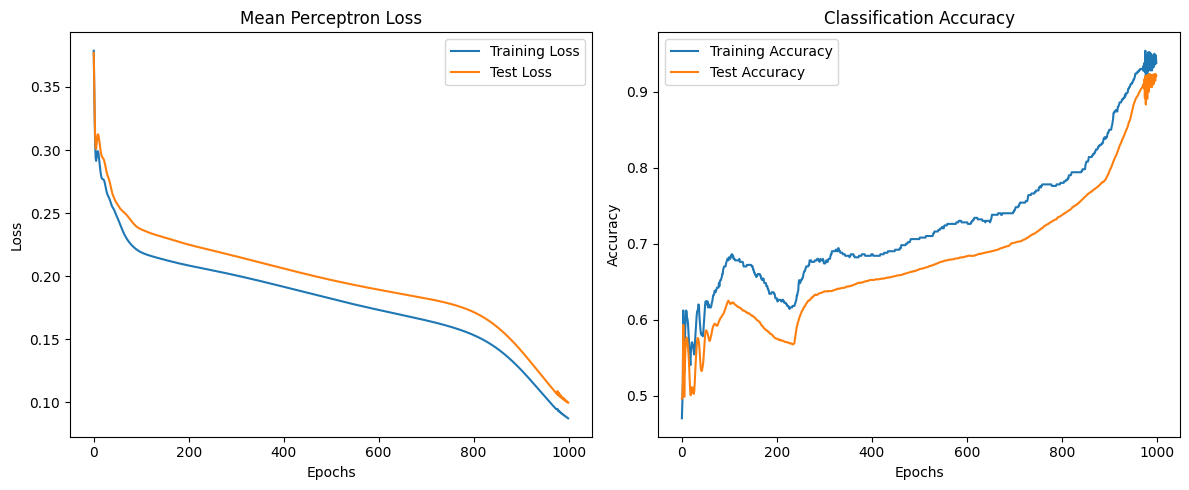

In [ ]:
plot_metrics(train_loss_history3, test_loss_history3, train_accuracy_history3, test_accuracy_history3)

###  Architecture 2: usage with sigmoid as activation for hidden and output layer

test loss= 0.0377 , test accuracy=  0.965

In [298]:
train_loss_history32, test_loss_history32, train_accuracy_history32, test_accuracy_history32 = train_mlp(
    x_train2, y_train2, x_test2, y_test2, weights2, biases2, sigmoid, sigmoid, learning_rate=1e-2, epochs=1000
)

Epoch 0/1000, Train Loss: 0.41600802751988736, Test Loss: 0.38802479764389225, Train Accuracy: 0.446, Test Accuracy: 0.496
Epoch 100/1000, Train Loss: 0.1818849316637801, Test Loss: 0.19491639851624476, Train Accuracy: 0.774, Test Accuracy: 0.7492
Epoch 200/1000, Train Loss: 0.1632673701524032, Test Loss: 0.17747831080862247, Train Accuracy: 0.804, Test Accuracy: 0.7692
Epoch 300/1000, Train Loss: 0.1511543517557177, Test Loss: 0.16688382089746534, Train Accuracy: 0.816, Test Accuracy: 0.7814
Epoch 400/1000, Train Loss: 0.1371441970642884, Test Loss: 0.15342310223138314, Train Accuracy: 0.83, Test Accuracy: 0.792
Epoch 500/1000, Train Loss: 0.09001917719619162, Test Loss: 0.10112567724266869, Train Accuracy: 0.928, Test Accuracy: 0.8989
Epoch 600/1000, Train Loss: 0.05212636567226437, Test Loss: 0.061257380131964155, Train Accuracy: 0.968, Test Accuracy: 0.947
Epoch 700/1000, Train Loss: 0.03902338455663407, Test Loss: 0.0483264067583271, Train Accuracy: 0.97, Test Accuracy: 0.9537
Epo

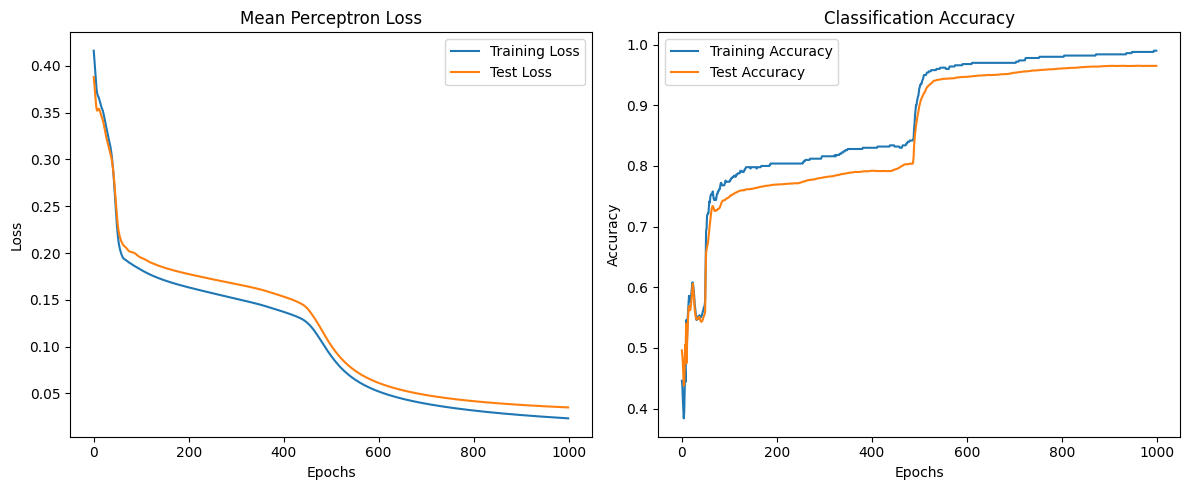

In [299]:
plot_metrics(train_loss_history32, test_loss_history32, train_accuracy_history32, test_accuracy_history32)

### Architecture 1: usage with tangent as activation for hidden and sigmoid for output layer
test loss= 0.1938, test accuracy= 0.8016


In [ ]:
train_loss_history4, test_loss_history4, train_accuracy_history4, test_accuracy_history4 = train_mlp(
    x_train2, y_train2, x_test2, y_test2, weights, biases, tanh, sigmoid, learning_rate=1e-2, epochs=1000
)

Epoch 0/1000, Train Loss: 0.41799595816934926, Test Loss: 0.4294206228517974, Train Accuracy: 0.57, Test Accuracy: 0.5613
Epoch 100/1000, Train Loss: 0.17184787561511472, Test Loss: 0.21766210561682342, Train Accuracy: 0.828, Test Accuracy: 0.7774
Epoch 200/1000, Train Loss: 0.1446557922908953, Test Loss: 0.19229948173595, Train Accuracy: 0.858, Test Accuracy: 0.801
Epoch 300/1000, Train Loss: 0.14312154842616065, Test Loss: 0.19038737943198789, Train Accuracy: 0.858, Test Accuracy: 0.8034
Epoch 400/1000, Train Loss: 0.14250032054354853, Test Loss: 0.19002497281873676, Train Accuracy: 0.858, Test Accuracy: 0.8051
Epoch 500/1000, Train Loss: 0.14221351175531532, Test Loss: 0.1899670267891428, Train Accuracy: 0.858, Test Accuracy: 0.805
Epoch 600/1000, Train Loss: 0.14185760511401282, Test Loss: 0.18997028019365395, Train Accuracy: 0.858, Test Accuracy: 0.8046
Epoch 700/1000, Train Loss: 0.14151414943302754, Test Loss: 0.19115418768086134, Train Accuracy: 0.86, Test Accuracy: 0.8036
Epoc

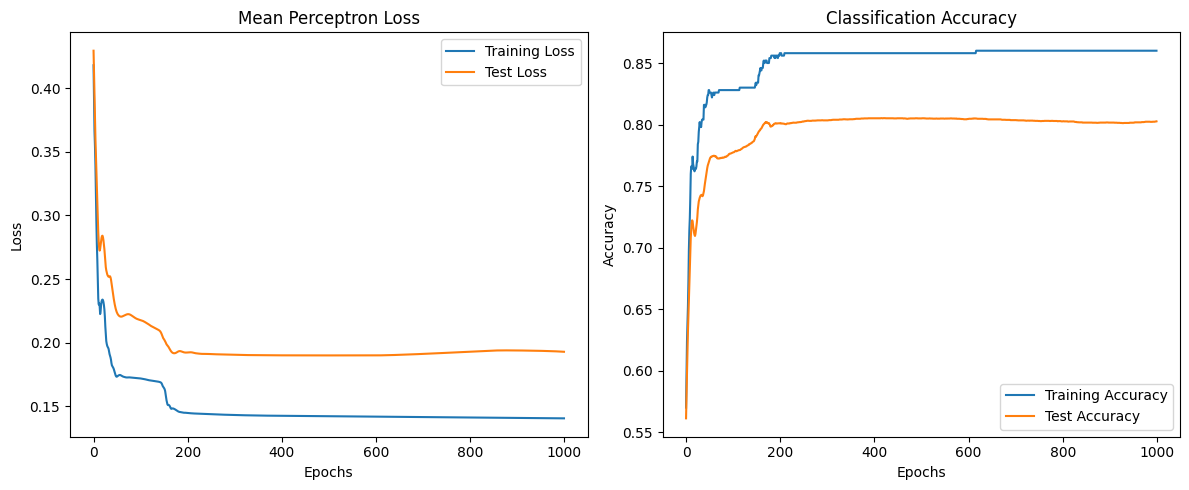

In [ ]:
plot_metrics(train_loss_history4, test_loss_history4, train_accuracy_history4, test_accuracy_history4)

### Architecture 2: usage with tangent as activation for hidden and sigmoid for output layer

test loss= 0.1258, test accuracy=  0.8184

In [300]:
train_loss_history42, test_loss_history42, train_accuracy_history42, test_accuracy_history42 = train_mlp(
    x_train2, y_train2, x_test2, y_test2, weights2, biases2, tanh, sigmoid, learning_rate=1e-2, epochs=1000
)

Epoch 0/1000, Train Loss: 0.37499896247112174, Test Loss: 0.3945036031840187, Train Accuracy: 0.524, Test Accuracy: 0.483
Epoch 100/1000, Train Loss: 0.11107675786452484, Test Loss: 0.1314231329864446, Train Accuracy: 0.854, Test Accuracy: 0.8105
Epoch 200/1000, Train Loss: 0.10249411868110654, Test Loss: 0.12529552316256262, Train Accuracy: 0.862, Test Accuracy: 0.8195
Epoch 300/1000, Train Loss: 0.10146216590054694, Test Loss: 0.12517197752828974, Train Accuracy: 0.862, Test Accuracy: 0.8199
Epoch 400/1000, Train Loss: 0.1007271804065886, Test Loss: 0.12461585761450647, Train Accuracy: 0.864, Test Accuracy: 0.8201
Epoch 500/1000, Train Loss: 0.1004763085607088, Test Loss: 0.1250395449598029, Train Accuracy: 0.864, Test Accuracy: 0.8189
Epoch 600/1000, Train Loss: 0.10036097872885878, Test Loss: 0.12540906799796722, Train Accuracy: 0.864, Test Accuracy: 0.8187
Epoch 700/1000, Train Loss: 0.10028853352508657, Test Loss: 0.12565701011949704, Train Accuracy: 0.864, Test Accuracy: 0.8185


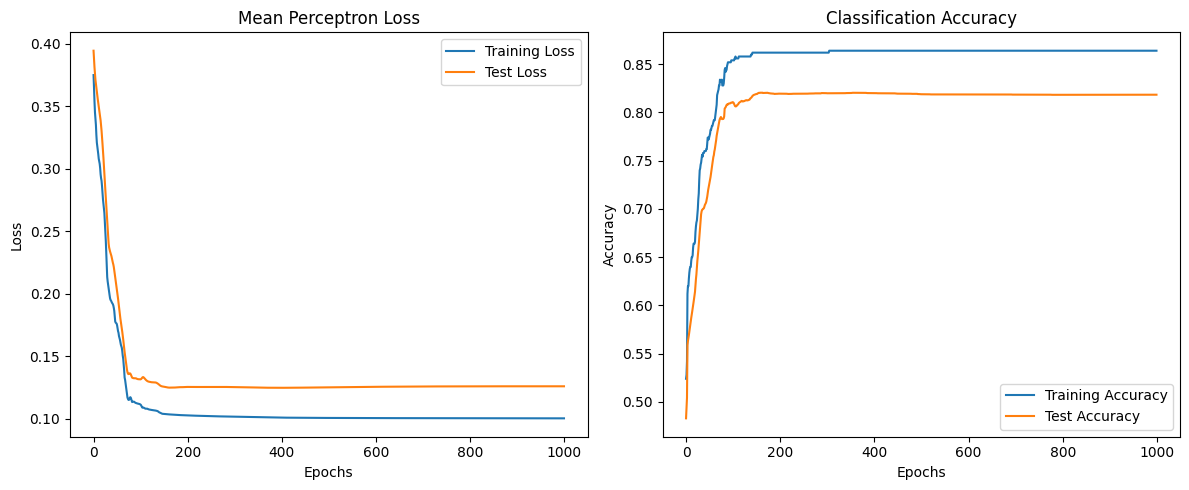

In [301]:
plot_metrics(train_loss_history42, test_loss_history42, train_accuracy_history42, test_accuracy_history42)

### Architecture 1:  usage with sigmoid as activation for hidden and tangent for output layer
test loss= 0.0828, test accuracy= 0.9294

In [ ]:
train_loss_history5, test_loss_history5, train_accuracy_history5, test_accuracy_history5 = train_mlp(
    x_train2, y_train2, x_test2, y_test2, weights, biases, sigmoid, tanh, learning_rate=1e-2, epochs=1000
)

Epoch 0/1000, Train Loss: 0.8745282202994056, Test Loss: 0.9758567358396669, Train Accuracy: 0.652, Test Accuracy: 0.5889
Epoch 100/1000, Train Loss: 0.11379838316701123, Test Loss: 0.12047232944614596, Train Accuracy: 0.912, Test Accuracy: 0.8998
Epoch 200/1000, Train Loss: 0.08288018024574524, Test Loss: 0.09217373846202069, Train Accuracy: 0.954, Test Accuracy: 0.9292
Epoch 300/1000, Train Loss: 0.07803128956557126, Test Loss: 0.08887243046939643, Train Accuracy: 0.952, Test Accuracy: 0.9296
Epoch 400/1000, Train Loss: 0.07597737937744563, Test Loss: 0.08705711822152416, Train Accuracy: 0.956, Test Accuracy: 0.9317
Epoch 500/1000, Train Loss: 0.07437664564775767, Test Loss: 0.0857009044445873, Train Accuracy: 0.958, Test Accuracy: 0.9319
Epoch 600/1000, Train Loss: 0.07309145880765651, Test Loss: 0.0846919708371358, Train Accuracy: 0.956, Test Accuracy: 0.931
Epoch 700/1000, Train Loss: 0.07200227848274424, Test Loss: 0.08397015633631637, Train Accuracy: 0.956, Test Accuracy: 0.9305

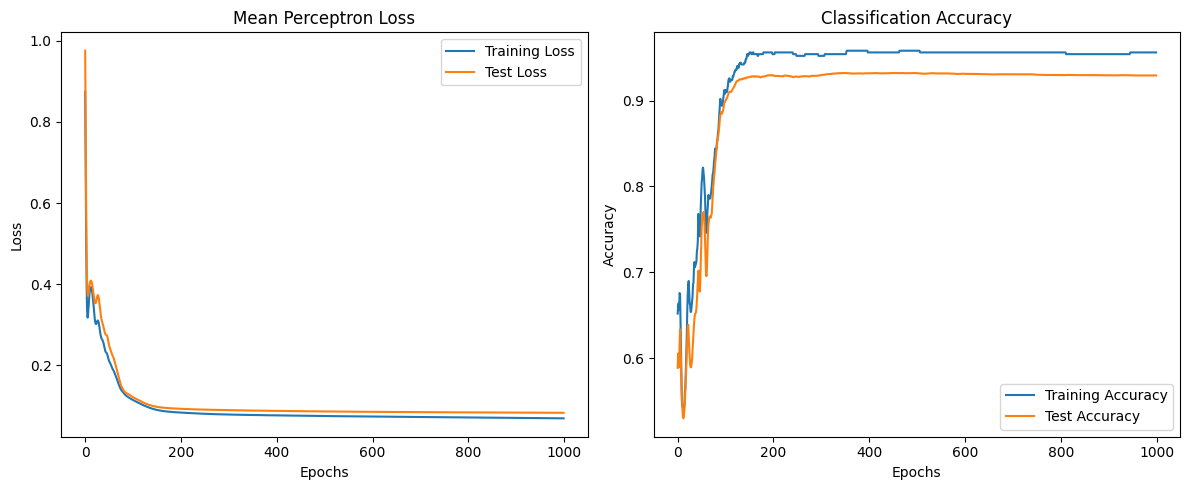

In [ ]:
plot_metrics(train_loss_history5, test_loss_history5, train_accuracy_history5, test_accuracy_history5)

### Architecture 2:  usage with sigmoid as activation for hidden and tangent for output layer
test loss= 0.0308 , test accuracy= 0.9662

In [302]:
train_loss_history52, test_loss_history52, train_accuracy_history52, test_accuracy_history52 = train_mlp(
    x_train2, y_train2, x_test2, y_test2, weights2, biases2, sigmoid, tanh, learning_rate=1e-2, epochs=1000
)

Epoch 0/1000, Train Loss: 2.2976700428986545, Test Loss: 2.274646441007272, Train Accuracy: 0.512, Test Accuracy: 0.5157
Epoch 100/1000, Train Loss: 0.1736240540269798, Test Loss: 0.20018664345235873, Train Accuracy: 0.832, Test Accuracy: 0.8107
Epoch 200/1000, Train Loss: 0.03717363005516565, Test Loss: 0.047283468240016495, Train Accuracy: 0.968, Test Accuracy: 0.9501
Epoch 300/1000, Train Loss: 0.03577434314294329, Test Loss: 0.04690502632360137, Train Accuracy: 0.97, Test Accuracy: 0.9493
Epoch 400/1000, Train Loss: 0.021028123742281045, Test Loss: 0.03284540125301088, Train Accuracy: 0.988, Test Accuracy: 0.9663
Epoch 500/1000, Train Loss: 0.01877102627068463, Test Loss: 0.03353347511547943, Train Accuracy: 0.99, Test Accuracy: 0.9662
Epoch 600/1000, Train Loss: 0.017746168339391098, Test Loss: 0.031141651753662007, Train Accuracy: 0.992, Test Accuracy: 0.9665
Epoch 700/1000, Train Loss: 0.016913755845299687, Test Loss: 0.03058510057730951, Train Accuracy: 0.992, Test Accuracy: 0.

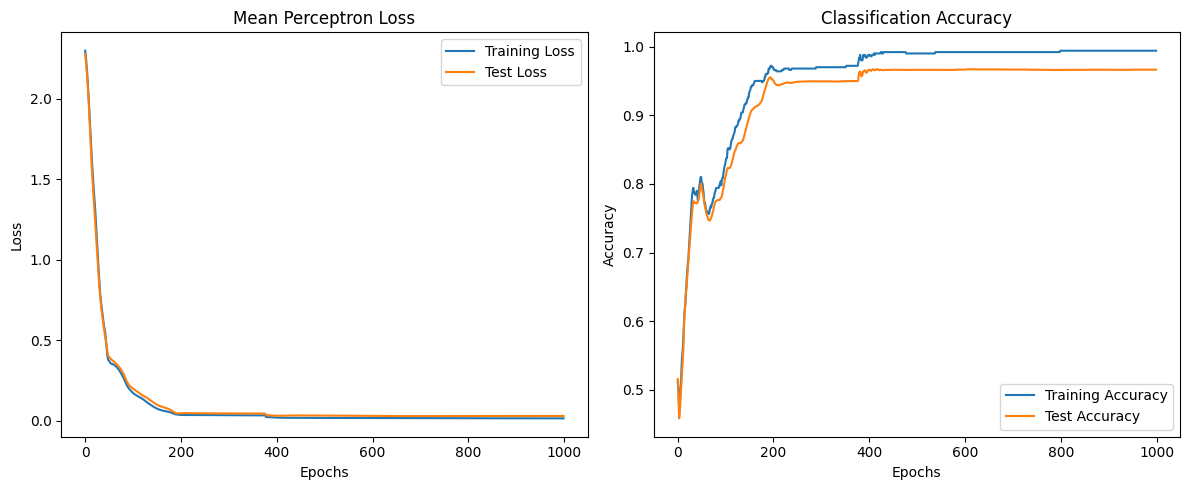

In [303]:
plot_metrics(train_loss_history52, test_loss_history52, train_accuracy_history52, test_accuracy_history52)

### Architecture 1:  usage with tangent as activation for hidden and output layer
test loss= 0.2017, test accuracy=  0.7979

In [ ]:
train_loss_history6, test_loss_history6, train_accuracy_history6, test_accuracy_history6 = train_mlp(
    x_train2, y_train2, x_test2, y_test2, weights, biases, tanh, tanh, learning_rate=1e-2, epochs=1000
)

Epoch 0/1000, Train Loss: 0.5015544858537337, Test Loss: 0.5107925955409033, Train Accuracy: 0.558, Test Accuracy: 0.553
Epoch 100/1000, Train Loss: 0.3119271383386322, Test Loss: 0.3200984346350717, Train Accuracy: 0.688, Test Accuracy: 0.69
Epoch 200/1000, Train Loss: 0.1693368390842311, Test Loss: 0.20154095731608954, Train Accuracy: 0.836, Test Accuracy: 0.8019
Epoch 300/1000, Train Loss: 0.16351694346774176, Test Loss: 0.1991581668627724, Train Accuracy: 0.842, Test Accuracy: 0.8019
Epoch 400/1000, Train Loss: 0.16248535288185526, Test Loss: 0.200968669375199, Train Accuracy: 0.842, Test Accuracy: 0.7986
Epoch 500/1000, Train Loss: 0.16196185428156698, Test Loss: 0.20238154238744724, Train Accuracy: 0.842, Test Accuracy: 0.7967
Epoch 600/1000, Train Loss: 0.16088466903836007, Test Loss: 0.20269857548194178, Train Accuracy: 0.842, Test Accuracy: 0.7957
Epoch 700/1000, Train Loss: 0.16060742593687763, Test Loss: 0.20258586046060004, Train Accuracy: 0.842, Test Accuracy: 0.7959
Epoch

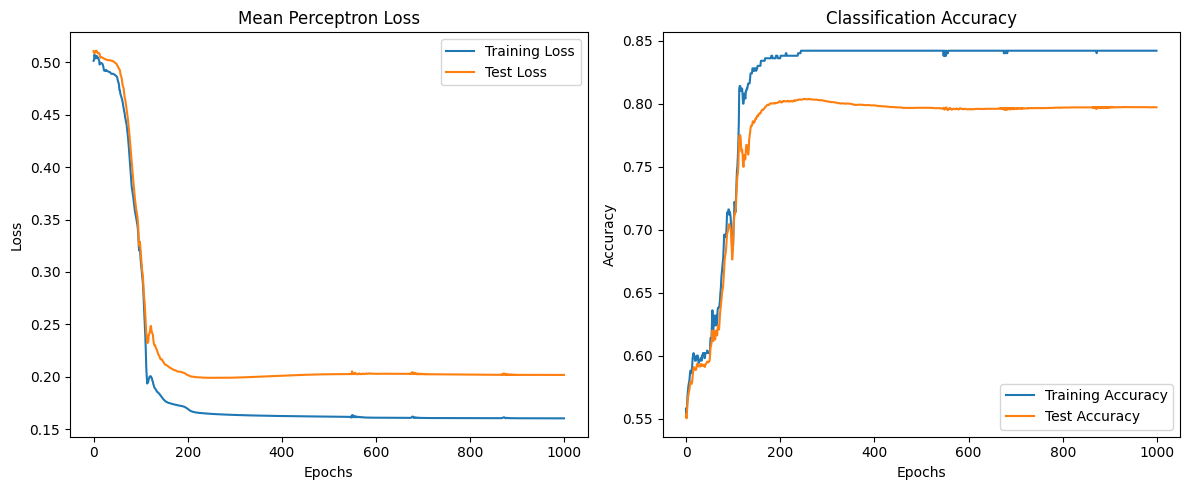

In [ ]:
plot_metrics(train_loss_history6, test_loss_history6, train_accuracy_history6, test_accuracy_history6)

### Architecture 2:  usage with tangent as activation for hidden and output layer
test loss=0.1418 , test accuracy= 0.807

In [304]:
train_loss_history62, test_loss_history62, train_accuracy_history62, test_accuracy_history62 = train_mlp(
    x_train2, y_train2, x_test2, y_test2, weights2, biases2, tanh, tanh, learning_rate=1e-2, epochs=1000
)

Epoch 0/1000, Train Loss: 0.821343023977347, Test Loss: 0.8208455160174917, Train Accuracy: 0.564, Test Accuracy: 0.5382
Epoch 100/1000, Train Loss: 0.12738486659364542, Test Loss: 0.149795404625715, Train Accuracy: 0.84, Test Accuracy: 0.8033
Epoch 200/1000, Train Loss: 0.11963377180193173, Test Loss: 0.14626238399664035, Train Accuracy: 0.848, Test Accuracy: 0.8065
Epoch 300/1000, Train Loss: 0.11901005810616806, Test Loss: 0.14587408298932342, Train Accuracy: 0.848, Test Accuracy: 0.8065
Epoch 400/1000, Train Loss: 0.11885666315817495, Test Loss: 0.14627849733094866, Train Accuracy: 0.848, Test Accuracy: 0.8065
Epoch 500/1000, Train Loss: 0.11870552566824356, Test Loss: 0.14624931411861297, Train Accuracy: 0.848, Test Accuracy: 0.8065
Epoch 600/1000, Train Loss: 0.1180094662933705, Test Loss: 0.14616722144718117, Train Accuracy: 0.85, Test Accuracy: 0.8069
Epoch 700/1000, Train Loss: 0.11760786689427441, Test Loss: 0.14546438391197408, Train Accuracy: 0.85, Test Accuracy: 0.8072
Epo

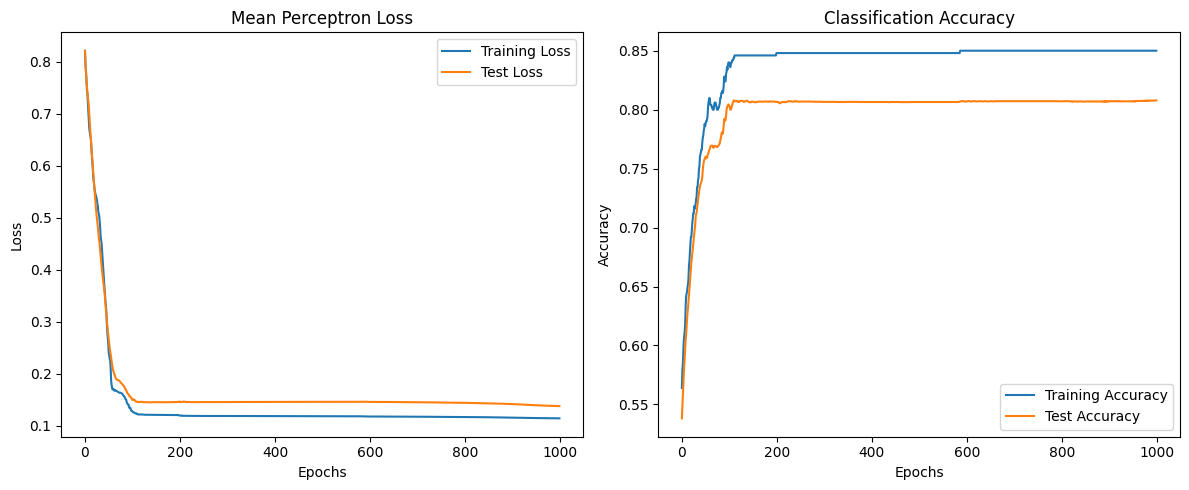

In [305]:
plot_metrics(train_loss_history62, test_loss_history62, train_accuracy_history62, test_accuracy_history62)